# Unit 5 - Financial Planning

In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

from MCForecastTools import MCSimulation

%matplotlib inline

In [16]:
# Load .env enviroment variables
load_dotenv('keyholder.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc =  1.2
my_eth = 5.3

In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [19]:
# Fetch current BTC price
# YOUR CODE HERE!
# Using the `requests` library to fetch the current price in US dollars of bitcoin (`BTC`)
response_btc = requests.get(btc_url)
data_btc = response_btc.json()
btc_price=data_btc['data']['1']["quotes"]["USD"]['price']

# Fetch current ETH price
# YOUR CODE HERE!
# Using the `requests` library to fetch the current price in US dollars of ethereum (`ETH`)
response_eth = requests.get(eth_url)
data_eth= response_eth.json()
eth_price=data_eth['data']['1027']["quotes"]["USD"]['price']

# Compute current value of my crpto
# YOUR CODE HERE!
# Computing the current value of crpto by multiplying price and current amount of crypto.
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74167.20
The current value of your 5.3 ETH is $20308.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# Assigning the api key, secret key and base url.
api_key = os.getenv("APCA_API_KEY_ID")
secret_key = os.getenv("ALPACA_SECRET_KEY")

base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
# YOUR CODE HERE!
# Creating the Alpaca API object using the `tradeapi.REST` function from the Alpaca SDK.
api = tradeapi.REST(
    api_key,
    secret_key,
    base_url,
    api_version="v2"
)

In [22]:
# Format current date as ISO format
# YOUR CODE HERE!
# Changing the current date into ISO format.
current_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
# Getting the `SPY` and `AGG` close prices from the Alpaca's `get_barset()` DataFrame.
portfolio_dataframe = api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date,
    limit=1000
).df

# Preview DataFrame
# YOUR CODE HERE!
portfolio_dataframe.head()



AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530  343.33   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-21 00:00:00-04:00  345.67  342.4  342.69  46745662

In [23]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
# Getting the closing prices from the dataframe on the basis of the specific column.
agg_close_price = portfolio_dataframe["AGG"]["close"].item()
spy_close_price = portfolio_dataframe["SPY"]["close"].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.515
Current SPY closing price: $342.69


In [24]:
# Compute the current value of shares
# YOUR CODE HERE!
# Computing the current value of share.
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


### Savings Health Analysis

In [25]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
# Computing the toatl value of crypto assets and total value of share.
total_portfolio = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}
# Create savings DataFrame
# YOUR CODE HERE!
# Creating the dataframe and saving into the variable.
savings_dataframe = pd.DataFrame(total_portfolio,index=['Crypto','Shares'])
# Display savings DataFrame
#display(df_savings)
savings_dataframe

,Amount
Crypto,94475.846
Shares,40637.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

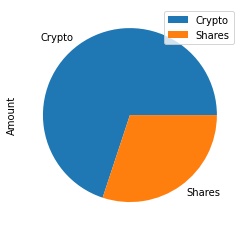

In [26]:
# Plot savings pie chart
# YOUR CODE HERE!
# Making pie chart.
savings_dataframe.plot(kind='pie', subplots=True)

In [27]:
# Set ideal emergency fund
ideal_emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
# Calculation the total amount of saving using the built in sum function.
total_amount_savings = savings_dataframe.sum().item()
# Validate saving health
# YOUR CODE HERE!
# Validating if the current savings are enough for an emergency fund using if condition.
if total_amount_savings > ideal_emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_amount_savings == ideal_emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${ideal_emergency_fund - total_amount_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [28]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# Setting start and ending date.
start_date_five = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_five = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
# Using the Alpaca API to get historical closing prices for the portfolio of `SPY` and `AGG` and converting them into the dataframe.
stock_data_dataframe = api.get_barset(
    tickers,
    timeframe,
    start = start_date_five,
    end = end_date_five,
    limit=1000
).df

# Display sample data
stock_data_dataframe.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
# Running Monte Carlo Simulation of `500` runs and `30` years for the weight of 40/60.
Monte_thirty_year = MCSimulation(
    portfolio_data = stock_data_dataframe,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Printing the simulation input data
# YOUR CODE HERE!
Monte_thirty_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
# Calculating the cumulative returns for 30 years firecas.
Monte_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


e:\Fiverr Projects\7D-Solutions-Git Projects\05-APIs\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995407,0.994699,1.007983,1.007885,1.000886,1.000670,1.002639,0.993847,1.011638,0.997377,...,1.006438,0.997117,1.007148,0.999894,0.987382,0.999878,0.997138,1.006694,1.009893,1.003002
2,1.005172,0.992415,1.008378,1.011262,0.995348,0.989066,1.018537,0.992025,1.020164,1.004991,...,1.013234,0.996675,1.000072,0.997745,0.983070,0.996039,0.989367,0.998144,1.007655,0.999283
3,1.002768,0.997829,1.009401,1.014064,0.998456,0.998786,1.014249,0.988928,1.030973,1.005528,...,1.023762,0.995473,0.997540,1.010109,0.974831,0.983528,0.990436,1.000025,1.005505,1.000083
4,0.998943,1.000755,1.021624,1.021250,1.002956,0.997451,1.012481,0.993909,1.021502,0.996580,...,1.026603,1.000185,0.992915,1.005924,0.988174,0.979350,0.988766,1.020802,1.002473,1.000236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,28.273720,19.383205,26.803788,30.953979,9.609525,24.727500,9.534920,10.311978,16.884752,23.864466,...,23.608418,41.983230,42.338228,8.751279,9.513284,14.780745,8.386950,29.053009,37.131873,40.387009
7557,28.517610,19.480447,26.293878,31.228656,9.657356,24.731250,9.545012,10.281977,16.844668,24.134384,...,23.651153,42.105025,42.361126,8.795917,9.513692,14.530927,8.433493,28.940632,37.171319,40.134852
7558,28.620607,19.305789,26.234041,31.508185,9.659032,24.581687,9.397035,10.211044,17.083356,23.907076,...,23.715005,41.664965,42.818425,8.800914,9.551404,14.502637,8.479339,29.370937,37.304129,40.507294
7559,28.508399,19.168143,26.141124,31.480390,9.655080,24.601661,9.405458,10.061153,16.963570,23.844105,...,23.228581,41.811035,42.309763,8.772538,9.604099,14.429660,8.381905,29.741853,36.986980,40.606604


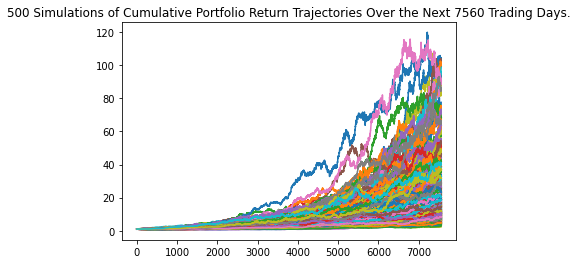

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
# Calculating the cumulative returns for 30 years using calc_cumulative_return function build in MCForecastTools.py file .
line_plot = Monte_thirty_year.plot_simulation()

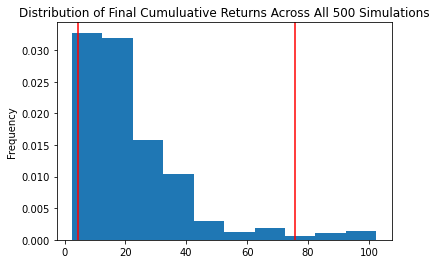

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
# Plotting probability distribution and confidence intervals using plot_distribution function build in MCForecastTools.py file.
dist_plot = Monte_thirty_year.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
# Calculating final summary statistics for Monte Carlo simulated stock data.
summary_stat = Monte_thirty_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stat)

count           500.000000
mean             22.294129
std              17.830379
min               2.415686
25%              10.511928
50%              17.071796
75%              28.242001
max             102.454484
95% CI Lower      4.360319
95% CI Upper     75.694672
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
# Calculating the possible outcomes by ci lower,ci upper with initial investment respectively and rounding of the value to two decimal place by using round function.
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87206.38 and $1513893.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
# Calculating the possible outcomes by ci lower,ci upper with initial investment respectively and rounding of the value to two decimal place by using round function.
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130809.56 and $2270840.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# Running Monte Carlo Simulation of `500` runs and `5` years for the weight of 40/60.
Monte_five_year = MCSimulation(
    portfolio_data = stock_data_dataframe,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# Calculating the cumulative returns for 5 years using calc_cumulative_return function build in MCForecastTools.py file .
Monte_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


e:\Fiverr Projects\7D-Solutions-Git Projects\05-APIs\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010991,1.001779,1.001901,1.000217,1.002729,0.996579,1.008954,0.997296,1.009815,0.987392,...,1.004270,0.985329,0.995360,1.000954,0.971603,0.998679,0.990820,1.003342,0.996069,1.001985
2,1.013920,1.020439,0.995956,1.000655,0.990947,0.993496,1.011203,0.999730,0.999690,0.980087,...,0.992278,0.978377,0.998113,1.002444,0.964544,1.005775,0.990774,0.989434,0.985204,1.004502
3,1.019030,1.020260,0.976667,0.998213,0.996730,1.005434,1.008259,1.006271,1.004959,0.981284,...,0.992868,0.973747,0.988158,1.008975,0.955247,1.019509,0.994148,1.002873,0.996757,1.017355
4,1.025492,1.021961,0.985852,0.997499,0.981932,1.000672,1.007129,0.993988,1.007165,0.992775,...,0.984018,0.970143,0.993802,1.015389,0.965317,1.016853,1.005783,1.008127,0.987119,1.025100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.317737,2.207156,1.222418,1.053320,1.883099,1.074265,1.531300,2.006248,2.775735,1.317021,...,1.496993,1.931160,1.918846,1.071890,1.328130,1.909330,1.546675,1.540008,1.385264,2.706813
1257,1.318326,2.175139,1.209068,1.058197,1.901166,1.073780,1.525012,1.971995,2.785160,1.317531,...,1.501577,1.975216,1.939236,1.072155,1.313944,1.892526,1.580344,1.542053,1.380908,2.707834
1258,1.316615,2.179567,1.199421,1.044147,1.918613,1.084744,1.524602,1.979169,2.777628,1.336932,...,1.504338,1.981947,1.957761,1.060160,1.304072,1.896640,1.575034,1.560940,1.368012,2.743849
1259,1.320120,2.202774,1.202169,1.028780,1.895163,1.103400,1.531191,1.960947,2.779728,1.366542,...,1.515578,1.975006,1.963381,1.054315,1.307703,1.890667,1.560990,1.563969,1.363424,2.740586


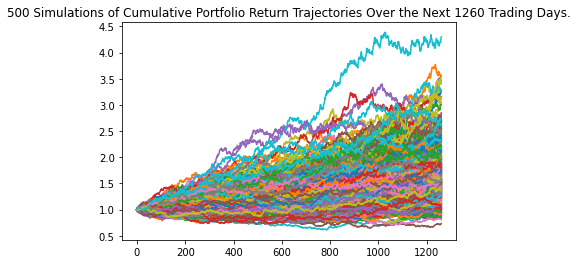

In [40]:
# Plot simulation outcomes
# YOUR CODE HERE!
# Plotting cumulative protfolio return trajectories using plot_sumulation function build in MCForecastTools.py file.
line_plot = Monte_five_year.plot_simulation()

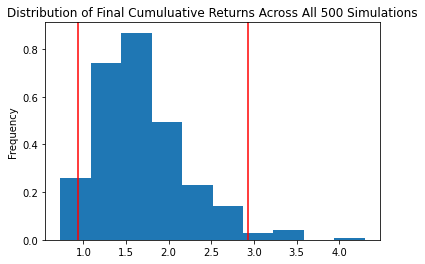

In [41]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
# Plotting probability distribution and confidence intervals using plot_distribution function build in MCForecastTools.py file.
dist_plot = Monte_five_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
# Calculating final summary statistics for Monte Carlo simulated stock data.
summary_stat_five = Monte_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stat_five)

count           500.000000
mean              1.677559
std               0.515518
min               0.729457
25%               1.326962
50%               1.569579
75%               1.929094
max               4.299707
95% CI Lower      0.941350
95% CI Upper      2.925736
Name: 1260, dtype: float64


In [43]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000*3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
# Calculating the possible outcomes by ci lower,ci upper with initial investment respectively and rounding of the value to two decimal place by using round function.
ci_lower_five = round(summary_stat_five[8]*initial_investment,2)
ci_upper_five = round(summary_stat_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56481.0 and $175544.13


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
# Running Monte Carlo Simulation of `500` runs and `10` years for the weight of 40/60.
Monte_ten_year = MCSimulation(
    portfolio_data = stock_data_dataframe,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
# Calculating the cumulative returns for 10 years using calc_cumulative_return function build in MCForecastTools.py file .
Monte_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


e:\Fiverr Projects\7D-Solutions-Git Projects\05-APIs\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010286,1.007489,0.996678,1.003475,0.999319,0.992573,1.007981,1.011721,0.991594,1.000308,...,0.997139,0.997578,0.992884,1.007232,0.996642,1.008390,0.992493,1.000471,1.013116,0.993850
2,1.006931,0.999958,1.007499,1.003511,0.998878,0.994845,1.005688,1.019463,0.974165,0.988004,...,1.015692,1.003670,0.986746,1.016614,0.998871,1.016985,1.002207,0.995573,1.011982,0.971454
3,1.008535,1.016871,1.014125,1.008162,0.991027,0.991520,1.003897,1.029632,0.995771,1.007480,...,1.010527,1.006848,0.992275,1.019732,0.994833,1.011683,1.002235,0.990663,1.011509,0.975240
4,1.002375,1.014170,1.030885,0.997536,0.978247,0.997480,1.011169,1.023179,0.985897,1.021339,...,1.007978,1.008195,1.000260,1.000925,0.989468,0.998803,0.980935,0.993931,1.001801,0.969530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.566815,1.542762,1.829755,2.983060,3.271773,2.018461,2.125155,3.966304,2.843745,4.298892,...,3.558702,2.532885,1.961701,3.958967,2.129613,2.429978,3.598256,1.332135,2.630151,1.926606
2517,2.546647,1.556419,1.831359,2.968719,3.251994,2.036559,2.138603,4.039796,2.783982,4.306426,...,3.499385,2.510774,1.967149,4.025686,2.115586,2.446828,3.599553,1.342520,2.592828,1.937749
2518,2.548041,1.552202,1.816492,2.975575,3.206942,2.054070,2.137365,3.990820,2.806484,4.303039,...,3.489950,2.521464,1.978258,4.087955,2.141845,2.424117,3.590695,1.348732,2.592045,1.924542
2519,2.570694,1.544485,1.832478,3.004897,3.175109,2.041169,2.153995,3.977308,2.840737,4.277774,...,3.499654,2.526179,1.957549,4.031370,2.132699,2.435420,3.640344,1.355466,2.590791,1.941921


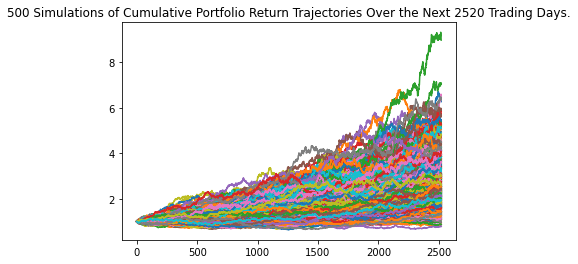

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
# Plotting cumulative protfolio return trajectories using plot_sumulation function build in MCForecastTools.py file.
cumm_portfolio_return_trajectories = Monte_ten_year.plot_simulation()

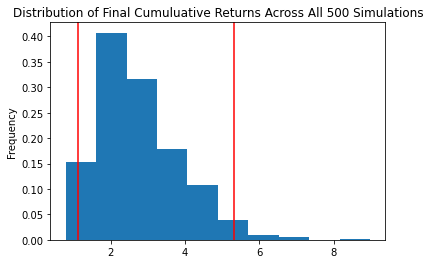

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
# Plotting probability distribution and confidence intervals using plot_distribution function build in MCForecastTools.py file.
distribution_plot = Monte_ten_year.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
# Calculating final summary statistics for Monte Carlo simulated stock data.
summary_stat_ten = Monte_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stat_ten)

count           500.000000
mean              2.751415
std               1.132460
min               0.781916
25%               1.932167
50%               2.547284
75%               3.414966
max               8.982091
95% CI Lower      1.113333
95% CI Upper      5.315690
Name: 2520, dtype: float64


In [49]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
# Calculating the possible outcomes by ci lower,ci upper with initial investment respectively and rounding of the value to two decimal place by using round function.
ci_lower_ten = round(summary_stat_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_stat_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66799.97 and $318941.38
